# Retail Data Wrangling and Analytics

In [1]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load Data from PSQL into DataFrame

**Setup Docker Containers**

![](https://i.imgur.com/VQrBVBk.jpg)

```
#make sure you have both Jupyter and PSQL docker container running
docker ps

#Attach a bridge network to both containers so they can communicate with each other
docker network create jarvis-net
#this command works on running containers
docker network connect jarvis-net jarvis-jupyter
docker network connect jarvis-net jarvis-psql

#verify both containers are attached to the jarvis-net
docker network inspect trading-net

#Note: instead of using `localhost`, you should use container names as hostnames.
```

**Data Preperation**

- Use [pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) api to load the PSQL retail table into a Pandas DataFrame

![](https://i.imgur.com/AmkAP63.jpg)

- Get familair with the transaction date with `df.head()`, `df.sample(10)`, `df.info()`, `df.describe()`, etc..



In [5]:
#install psql "driver"
!pip3 install psycopg2-binary

In [14]:
import psycopg2
conn = psycopg2.connect(
    dbname="postgres",
    user="saghanamaheshsarma",
    password="password",
    host="localhost",
    port="5432"
)


query = "SELECT * FROM retail"

# Use pandas to read SQL query results into a DataFrame
retail_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()


In [19]:

#head - prints first few rows of the data frame
retail_df.head()

#sample - randomly selects and displays 10 rows from the dataframe
retail_df.sample(10)


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
388506,526745,22544,MINI JIGSAW SPACEBOY,48,2010-10-13 08:29:00,0.42,13297.0,United Kingdom
142427,502887,47566B,TEA TIME PARTY BUNTING,400,2010-03-29 11:28:00,3.75,16754.0,United Kingdom
882084,568057,47566b,TEA TIME PARTY BUNTING,2,2011-09-23 12:56:00,8.29,NaN,United Kingdom
450179,532145,22643,SET OF 4 NAPKIN CHARMS LEAVES,2,2010-11-11 11:52:00,2.55,16412.0,United Kingdom
441399,531468,22662,LUNCH BAG DOLLY GIRL DESIGN,1,2010-11-08 13:58:00,1.65,14821.0,United Kingdom
152718,503921,71459,HANGING JAM JAR T-LIGHT HOLDER,12,2010-04-08 12:51:00,0.85,15613.0,United Kingdom
504146,536530,82552,WASHROOM METAL SIGN,1,2010-12-01 13:21:00,1.45,17905.0,United Kingdom
713318,553009,22931,BAKING MOULD HEART WHITE CHOCOLATE,10,2011-05-12 16:52:00,2.55,13601.0,United Kingdom
152099,503859,20723,STRAWBERRY CHARLOTTE BAG,20,2010-04-08 10:30:00,0.85,14855.0,United Kingdom
718918,C553531,S,SAMPLES,-1,2011-05-17 15:09:00,15.50,NaN,United Kingdom


In [20]:
#info gives concise summary of the data frame 
retail_df.info()

#describe gives statstics for the numerical columns in the data
retail_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,quantity,unit_price,customer_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Load CSV into Dataframe
Alternatively, the LGS IT team also dumped the transactional data into a [CSV file](https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv). However, the CSV header (column names) doesn't follow the snakecase or camelcase naming convention (e.g. `Customer ID` instead of `customer_id` or `CustomerID`). As a result, you will need to use Pandas to clean up the data before doing any analytics. In addition, unlike the PSQL scheme, CSV files do not have data types associated. Therefore, you will need to cast/convert certain columns into correct data types (e.g. DateTime, numbers, etc..)

**Data Preperation**

- Read the `data/online_retail_II.csv` file into a DataFrame
- Rename all columns to upper camelcase or snakecase
- Convert/cast all columns to the appropriate data types (e.g. datetime)

In [40]:
#read_csv into data frame
retail_df = pd.read_csv("online_retail_II.csv")

#rename columns to upper camel case

def upper_camelcase(s):
    if s.islower() or s.isupper():
        return s
    else:
        return ''.join(word.capitalize() for word in s.split())

retail_df.columns = [upper_camelcase(col) for col in retail_df.columns]

retail_df.head()

# Convert/cast columns to appropriate data types
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str)
retail_df['StockCode'] = retail_df['StockCode'].astype(str)
retail_df['Description'] = retail_df['Description'].astype(str)
retail_df['Quantity'] = retail_df['Quantity'].astype(int)
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df['UnitPrice'] = retail_df['UnitPrice'].astype(float)
retail_df['CustomerId'] = retail_df['CustomerId'].astype(float)
retail_df['Country'] = retail_df['Country'].astype(str)

# Print the DataFrame information
print(retail_df.info())

# Display the DataFrame
print(retail_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1067371 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   UnitPrice    1067371 non-null  float64       
 6   CustomerId   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3  

# Total Invoice Amount Distribution

---
**Please remove this insturction cell after you are done with coding**

1. Calculate the invoice amount. Note: an invoice consists of one or more items where each item is a row in the df. (hint: you need to `GROUP BY invoice`)
2. Draw the distribution of invoice amount with min, max, median, mod, and mean. However, you will notice many outlier data (e.g. invoices with large amounts). Sample hist and box charts:

![](https://i.imgur.com/N8hsbDa.jpg)

3. Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean.


![](https://i.imgur.com/tJrH1qj.jpg)


---

In [55]:
# Write your code in one or more cells (please remove this line from your notebook)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filtered_df = retail_df[retail_df['Quantity'] * retail_df['UnitPrice'] > 0]

filtered_df['InvoiceAmount'] = filtered_df['Quantity'] * filtered_df['UnitPrice']

total_invoice_amount = filtered_df.groupby('InvoiceNo')['InvoiceAmount'].sum()
total_invoice_amount


/var/folders/63/y3b2n2yx4yg9nh40z4ngsdw40000gn/T/ipykernel_81209/3945360787.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['InvoiceAmount'] = filtered_df['Quantity'] * filtered_df['UnitPrice']


InvoiceNo
489434       505.30
489435       145.80
489436       630.33
489437       310.75
489438      2286.24
             ...   
581585       329.05
581586       339.20
581587       267.45
A563185    11062.06
C496350      373.57
Name: InvoiceAmount, Length: 40078, dtype: float64

In [56]:
invoice_amount_stats = total_invoice_amount.describe() 

invoice_amount_stats

count     40078.000000
mean        523.303761
std        1517.351646
min           0.190000
25%         151.972500
50%         304.315000
75%         504.892500
max      168469.600000
Name: InvoiceAmount, dtype: float64

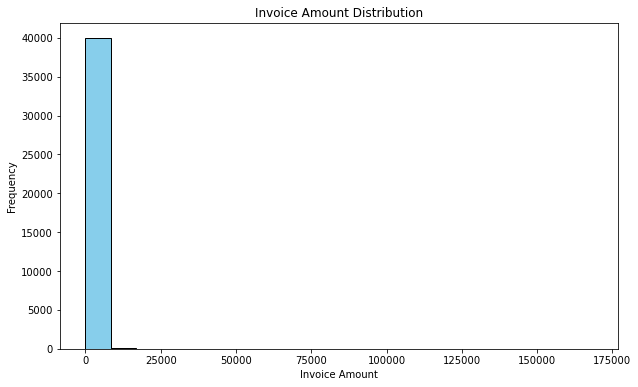

In [58]:
plt.figure(figsize=(10,6))
plt.hist(total_invoice_amount,color = 'skyblue',edgecolor = 'black')
plt.title('Invoice Amount Distribution')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')
plt.show()

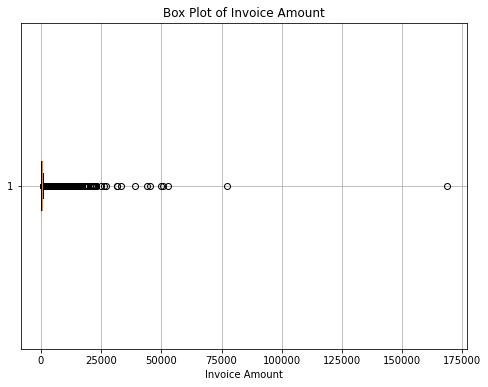

In [62]:
plt.figure(figsize=(8, 6))
plt.boxplot(total_invoice_amount, vert=False)
plt.title('Box Plot of Invoice Amount')
plt.xlabel('Invoice Amount')
plt.grid(True)
plt.show()

In [68]:
# 3. Distribution for the first 85 quantiles of the invoice amount data
quantiles = total_invoice_amount.quantile([i/100 for i in range(1, 86)])

quantiles.describe()


count     85.000000
mean     275.932686
std      178.249476
min        4.200000
25%      136.494000
50%      260.400000
75%      381.092800
max      724.389500
Name: InvoiceAmount, dtype: float64

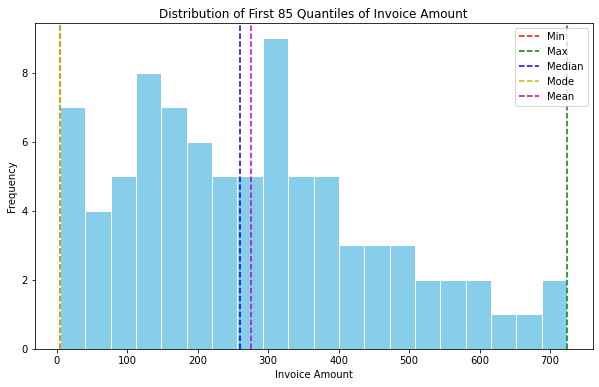

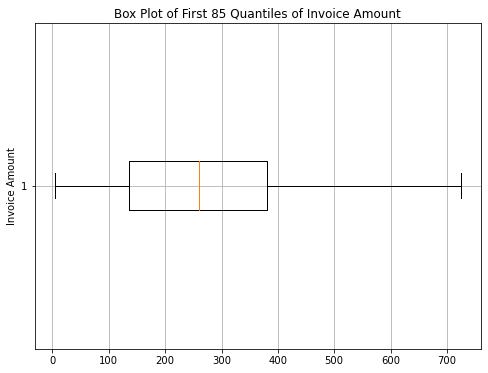

In [77]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(quantiles, bins=20, color='skyblue', edgecolor='white')
plt.title('Distribution of First 85 Quantiles of Invoice Amount')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')
plt.axvline(quantiles.min(), color='r', linestyle='--', label='Min')  # Plot min as a dotted line
plt.axvline(quantiles.max(), color='g', linestyle='--', label='Max')  # Plot max as a dotted line
plt.axvline(quantiles.median(), color='b', linestyle='--', label='Median')  # Plot median as a dotted line
plt.axvline(quantiles.mode()[0], color='y', linestyle='--', label='Mode')  # Plot mode as a dotted line
plt.axvline(quantiles.mean(), color='m', linestyle='--', label='Mean')  # Plot mean as a dotted line
plt.legend()  # Show legend
plt.show()

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(quantiles,vert=False)
plt.title('Box Plot of First 85 Quantiles of Invoice Amount')
plt.ylabel('Invoice Amount')
plt.grid(True)
plt.show()

# Monthly Placed and Canceled Orders

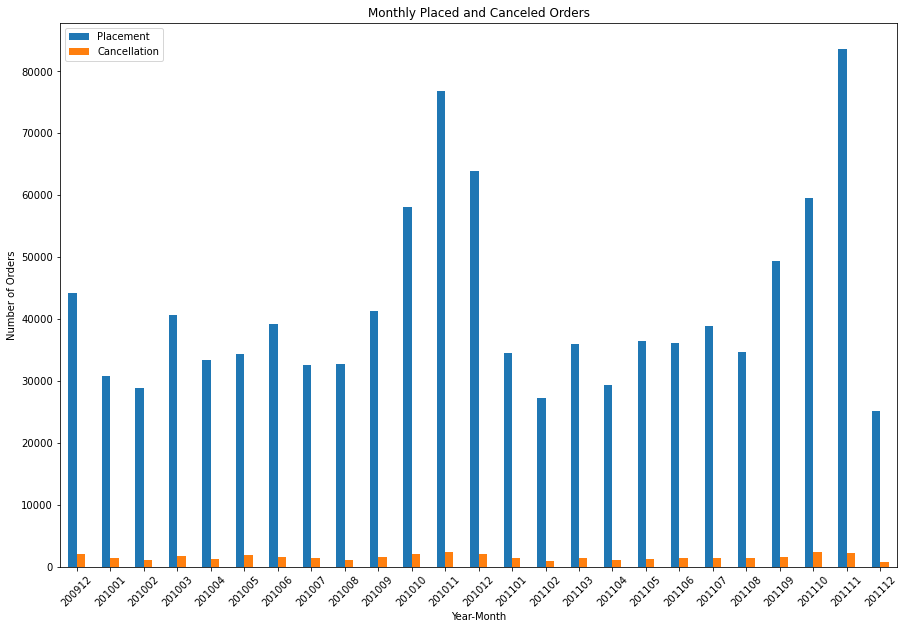

In [83]:
# Step 1: Create a new column with YYYYMM format
retail_df['InvoiceYearMonth'] = retail_df['InvoiceDate'].dt.year * 100 + retail_df['InvoiceDate'].dt.month


# Step 2: Count the number of placed and canceled orders for each month
# Separate placed and canceled orders
placed_orders = retail_df[~retail_df['InvoiceNo'].str.startswith('C')]
canceled_orders = retail_df[retail_df['InvoiceNo'].str.startswith('C')]

# Group placed orders by month and count
monthly_placed_orders = placed_orders.groupby('InvoiceYearMonth').size().reset_index(name='Placement')

# Group canceled orders by month and count (considering each canceled order has an original invoice)
monthly_canceled_orders = canceled_orders.groupby('InvoiceYearMonth').size().reset_index(name='Cancellation')
monthly_canceled_orders['Cancellation'] *= 2  # Each canceled order contributes to two invoices

# Merge placed and canceled orders
monthly_orders = pd.merge(monthly_placed_orders, monthly_canceled_orders, on='InvoiceYearMonth', how='outer').fillna(0)

# Plotting
monthly_orders.plot(x="InvoiceYearMonth", y=['Placement', 'Cancellation'], kind='bar', figsize=(15, 10))
plt.title("Monthly Placed and Canceled Orders")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

---
**Please remove this insturction cell after you are done with coding**

- The attribute information (see the `project kick-off` section) contains useful information that helps you to identify canceled orders
- To simplify the problem, you can assume that there are two invoice numbers for each canceled order (one for the original invoice and one for the canceled invoice). Therefore, `# of placed orders = total # of orders - 2 * canceled order`. Furthermore, you can also assume the original invoice and canceled invoice are on always on the same day (this eliminate the case where the original invoice and canceled invoices are on different months)
- hints: you might want to create a new integer column with YYYYMM format. e.g. `2009-12-01 07:45:00 -> 200912` which allows easy GROUP BY.

**Sample Plot:**

![](https://i.imgur.com/tmLsPDf.jpg)

---

# Monthly Sales

---
**Please remove this insturction cell after you are done with coding**


- Calculate the monthly sales data
- Plot a chart to show monthly sales (e.g. x-asix=year_month, y-axis=sales_amount)

![](https://i.imgur.com/k1KOqKO.jpg)

---

(array([200980., 201000., 201020., 201040., 201060., 201080., 201100.,
        201120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

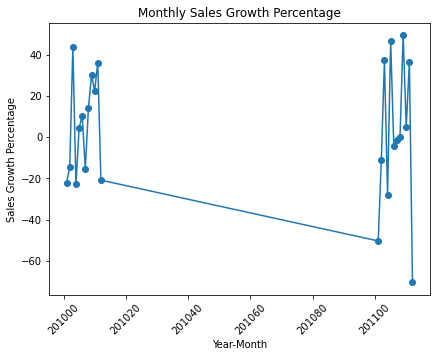

In [112]:
# Calculate monthly sales
monthly_sales = retail_df.groupby('InvoiceYearMonth')['TotalAmount'].sum().reset_index()

# Calculate Monthly Sales Growth Percentage
monthly_sales['SalesGrowthPercentage'] = monthly_sales['TotalAmount'].pct_change() * 100

# Plotting
plt.figure(figsize=(15, 5))


# Monthly Sales Growth Percentage
plt.subplot(1, 2, 2)
plt.plot(monthly_sales['InvoiceYearMonth'], monthly_sales['SalesGrowthPercentage'], marker='o', linestyle='-')
plt.title('Monthly Sales Growth Percentage')
plt.xlabel('Year-Month')
plt.ylabel('Sales Growth Percentage')
plt.xticks(rotation=45,monthly_sales['YearMonth'])


# Monthly Sales Growth


---
**Please remove this insturction cell after you are done with coding**

- Calculate monthly sales percentage growth data
- Plot a chart to show the growth percentage

![](https://i.imgur.com/J3btp8j.jpg)

---

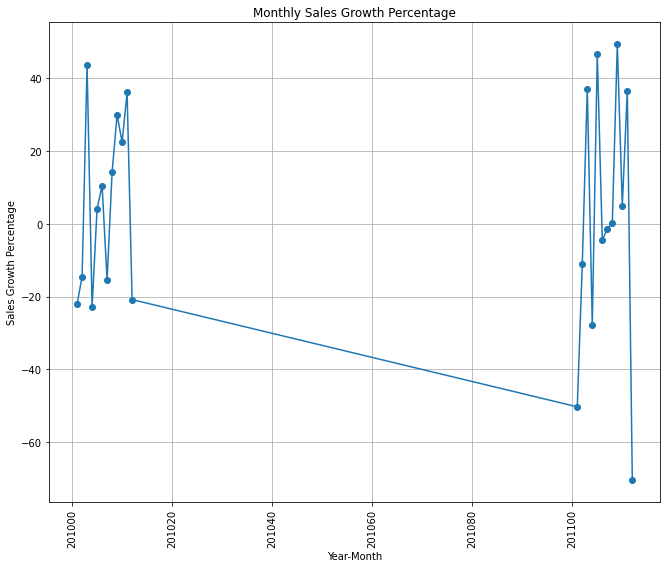

In [124]:
retail_df.head()
# Calculate Monthly Sales
monthly_sales = retail_df.groupby('InvoiceYearMonth')['TotalAmount'].sum().reset_index()

# Calculate Monthly Sales Growth Percentage
monthly_sales['SalesGrowthPercentage'] = monthly_sales['TotalAmount'].pct_change() * 100

# Plotting
plt.figure(figsize=(18, 8))


# Monthly Sales Growth Percentage
plt.subplot(1, 2, 2)
plt.plot(monthly_sales['InvoiceYearMonth'], monthly_sales['SalesGrowthPercentage'], marker='o', linestyle='-')
plt.title('Monthly Sales Growth Percentage')
plt.xlabel('Year-Month')
plt.ylabel('Sales Growth Percentage')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

# Monthly Active Users

---
**Please remove this insturction cell after you are done with coding**

- Compute # of active users (e.g. unique `CusotomerID`) for each month
- Plot a bar chart

![](https://i.imgur.com/eFYp8VF.jpg)

---

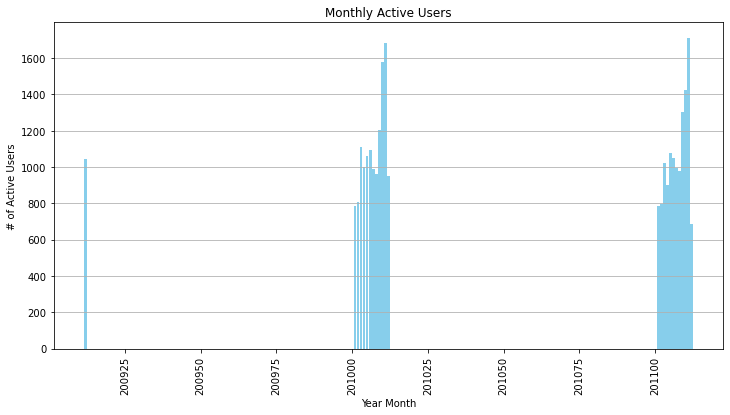

In [127]:
active_users = retail_df.groupby('InvoiceYearMonth')['CustomerId'].nunique().reset_index()

plt.figure(figsize = (12,6))
plt.bar(active_users['InvoiceYearMonth'],active_users['CustomerId'],color = 'skyblue')
plt.title('Monthly Active Users')
plt.xlabel('Year Month')
plt.ylabel('# of Active Users')
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

# New and Existing Users



---
**Please remove this insturction cell after you are done with coding**

- Plot a diagram to show new and exiting user for each month.
- A user is identified as a new user when he/she makes the first purchase
- A user is identified as an existing user when he/she made purchases in the past
- hints:
  - find out the first purchase year-month for each user and then join this data with the transactional data to help you identified new/exiting users

![](https://i.imgur.com/nWjnrpr.jpg)

---

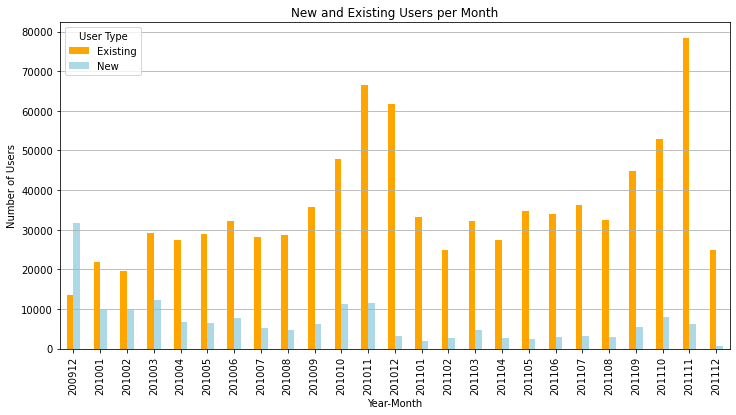

In [139]:
# Find out the first purchase year-month for each user
first_purchase = retail_df.groupby('CustomerId')['InvoiceYearMonth'].min().reset_index()
first_purchase.columns = ['CustomerId', 'FirstPurchaseYearMonth']

# Join the first purchase data with the transactional data
retail_df = pd.merge(retail_df, first_purchase, on='CustomerId', how='left')

# Identify new and existing users
retail_df['UserType'] = 'Existing'
retail_df.loc[retail_df['InvoiceYearMonth'] == retail_df['FirstPurchaseYearMonth'], 'UserType'] = 'New'

# Group by InvoiceYearMonth and UserType to count new and existing users
user_counts = retail_df.groupby(['InvoiceYearMonth', 'UserType']).size().unstack(fill_value=0)

# Plotting
user_counts.plot(kind='bar', stacked= False,figsize=(12, 6),color=['orange','lightblue'])
plt.title('New and Existing Users per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.legend(title='User Type')
plt.grid(axis='y')
plt.show()

## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

In [140]:
rfm = retail_df.groupby('CustomerId').agg({
    'InvoiceDate': lambda x: (pd.to_datetime('now') - x.max()).days,  # Recency: days since last purchase
    'InvoiceNo': 'count',  # Frequency: number of purchases
    'TotalAmount': 'sum'  # Monetary Value: total spending
}).reset_index()

# Rename the columns
rfm.columns = ['CustomerId', 'Recency', 'Frequency', 'Monetary']

# Display the RFM DataFrame
print(rfm)

      CustomerId  Recency  Frequency  Monetary
0        12346.0     4836         48    -64.68
1        12347.0     4513        253   5633.32
2        12348.0     4586         51   2019.40
3        12349.0     4529        180   4404.54
4        12350.0     4821         17    334.40
...          ...      ...        ...       ...
5937     18283.0     4514        986   2736.65
5938     18284.0     4940         29    436.68
5939     18285.0     5171         12    427.00
5940     18286.0     4987         70   1188.43
5941     18287.0     4553        156   4177.89

[5942 rows x 4 columns]


# RFM Segmentation

---
**Please remove this insturction cell after you are done with coding**
RFM segmentation categorizes your customers into different segments, according to their interactions with your website, which will allow you to subsequently approach these groups in the most effective way. In this article, we will show you how to make an RFM segmentation based on an RFM score combining all three RFM parameters together and allowing you to divide your customers into 11 different segments. 

- [RFM Segmentation business cases](https://docs.exponea.com/docs/rfm-segmentation-business-use)

- [RFM Segmentation Guide](https://docs.exponea.com/docs/rfm-segmentation-business-use)

As you can see, computing RFM segmentation requires extensive domain knowledge in marketing which is out of the scope in this project. In practice, you will work with BA/DA to figure out how to compute RFM segments. To simplify this project, a [sample RFM segmentation Notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) is provided. You are responsible to understand everything from that Notebook and then integrate it into yours. 

- Download the [sample notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) and import to your Jupyter Notebook or VSCode
- Run the notebook and understand all cells
- Read the remark section at the end of the notebook. You will need this information when writing the README file
- Integrate the RFM segmentation calculation into your notebook

---